In [4]:
# Load helper code
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git &>/dev/null;
import pandas
import ipywidgets as widgets
import math
import numpy as np
import matplotlib.pyplot as plt


The syntax of the command is incorrect.


In [5]:
# Make selections about programs, active facilities, and NAICS codes
from backend_scripts.programs_facilities_codes import make_selections
selections = make_selections()


SelectMultiple(description='Programs', options=('NPDES_FLAG', 'AIR_FLAG', 'RCRA_FLAG'), value=())

Checkbox(value=False, description='Only active facilities?')

Text(value='', description='NAICS codes', placeholder='Enter NAICS codes here, separated with a comma')

In [9]:
# Create the SQL query string
# Filter by programsx = 5x = 5
from backend_scripts.query_and_filter import query
squery = query(selections)
print(squery)

(("NPDES_FLAG" = 'Y' and "FAC_ACTIVE_FLAG" = 'Y') and ("FAC_NAICS_CODES" like ' %1111%%' or "FAC_NAICS_CODES" like '1111%%' or "CWA_NAICS" like ' %1111%%' or "CWA_NAICS" like '1111%%'))


In [10]:
# Access the ECHO_EXPORTER table
# Output will be the matching tracked by EPA

from ECHO_modules.get_data import get_echo_data


sql = 'select "FAC_NAME", "CWA_NAICS", "CAA_NAICS", "RCRA_NAICS", "FAC_NAICS_CODES", "FAC_LAT", "FAC_LONG", "FAC_PERCENT_MINORITY", "FAC_TOTAL_PENALTIES", "FAC_QTRS_WITH_NC", "FAC_PENALTY_COUNT", "EJSCREEN_FLAG_US" from "ECHO_EXPORTER" where ' + squery
try:
  echo = get_echo_data( sql )
except pandas.errors.EmptyDataError:
  print("\nThere are no records.\n")
  
echo

FAC_NAME  \
0                             ENCOAT INTERNATIONAL INC   
1                              COURTER'S FINISHER FARM   
2                       BUTLER SCHIAVO 95 NEW IND BLDG   
3                               HICKORY RUN STATE PARK   
4    ST LUKE UNIV HEALTH NET CARBON CAMPUS MED OFF ...   
..                                                 ...   
107                           CENTRAL LAKE COUNTY JAWA   
108                      LIQUID CONTAINER/1275 NUCLEAR   
109                            EUGENE-SPRINGFIELD WPCF   
110     AIR PRODS  & CHEMICALS INC   SPECIALTY GAS DIV   
111                                        WYCKOFF WTP   

                              CWA_NAICS  CAA_NAICS RCRA_NAICS  \
0                                   NaN        NaN      11111   
1    111940 112120 111150 111110 112210        NaN        NaN   
2                                111130        NaN        NaN   
3                         721211 111120        NaN        NaN   
4                                111120        NaN        NaN   
..                                  ...        ...        ...   
107                                 NaN        NaN      11111   
108                                 NaN        NaN      11111   
109                                 NaN   999999.0      11111   
110                              111130   325120.0     325120   
111                                 NaN        NaN      11111   

                        FAC_NAICS_CODES    FAC_LAT    FAC_LONG  \
0                                 11111  30.561040  -91.054570   
1    111150 111940 112210 112120 111110  41.031944  -77.563889   
2                                111130  40.936200  -75.949400   
3                         111120 721211  41.021667  -75.711389   
4                                111120  40.843917  -75.671361   
..                                  ...        ...         ...   
107                               11111  42.279570  -87.861220   
108                        11111 326160  41.903410  -88.232580   
109           11111 999999 221118 22132  44.095584 -123.111946   
110           325120 32512 49311 111130  40.836389  -76.030833   
111                         11111 22131  34.045562  -84.688967   

     FAC_PERCENT_MINORITY  FAC_TOTAL_PENALTIES  FAC_QTRS_WITH_NC  \
0                  14.754                    0                12   
1                   1.854                    0                 0   
2                  37.174                    0                 0   
3                  12.238                    0                 0   
4                   4.231                    0                 0   
..                    ...                  ...               ...   
107                31.246                    0                 0   
108                41.372                    0                 0   
109                16.142                    0                11   
110                 2.198                35200                 2   
111                31.909                    0                 0   

     FAC_PENALTY_COUNT EJSCREEN_FLAG_US  
0                  NaN                N  
1                  NaN                N  
2                  NaN                N  
3                  NaN                N  
4                  NaN                N  
..                 ...              ...  
107                NaN                N  
108                NaN                N  
109                NaN                N  
110                2.0                N  
111                NaN                N  

[112 rows x 12 columns]

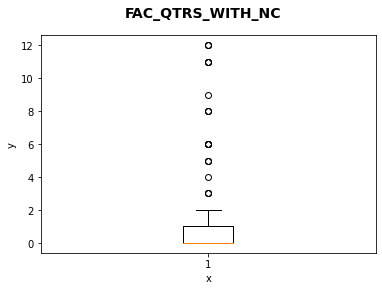

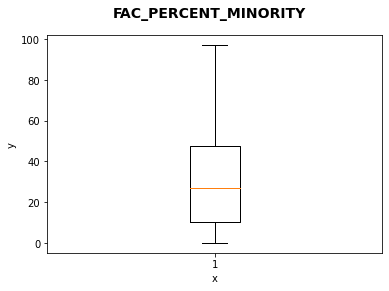

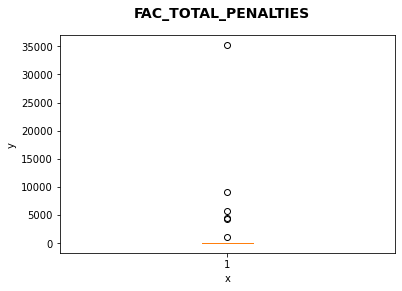

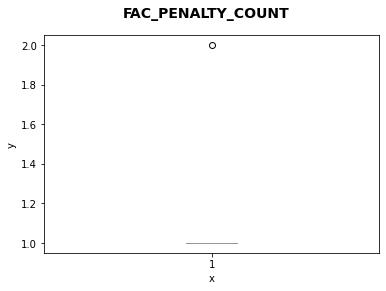

In [13]:
from backend_scripts.mean_medians import plot_visual_data_box_plot
plot_visual_data_box_plot(echo.FAC_QTRS_WITH_NC, "FAC_QTRS_WITH_NC", "x", "y")
plot_visual_data_box_plot(echo.FAC_PERCENT_MINORITY, "FAC_PERCENT_MINORITY", "x", "y" )
plot_visual_data_box_plot(echo.FAC_TOTAL_PENALTIES, "FAC_TOTAL_PENALTIES", "x", "y" )
plot_visual_data_box_plot(echo.FAC_PENALTY_COUNT, "FAC_PENALTY_COUNT", "x", "y" )

In [ ]:
# Export the data to the "Files" side panel for download
echo.to_csv("data.csv")

In [8]:
# Map the facilities
import folium
from folium.plugins import MarkerCluster
import math

map = folium.Map()
marker_cluster = MarkerCluster().add_to(map)

for index, row in echo.iterrows():
  if math.isnan(row["FAC_LAT"]) or math.isnan(row["FAC_LONG"]): #ignore facilities with no spatial data
    pass
  else:
    marker = folium.Marker(
        location = [float(row["FAC_LAT"]), float(row["FAC_LONG"])],
        popup = row["FAC_NAME"]
    ).add_to(marker_cluster)

map

ModuleNotFoundError: No module named 'folium'